In [4]:
import requests
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import plotly.express as px
import json
from pprint import pprint
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# отображать текст в датафрейме полностью
# pd.set_option('display.max_colwidth', None)

In [5]:
# отображать все колонки
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("processed_data.csv")

In [7]:
df.head(5)

,name,role,employer.name,area.name,salary_from,salary_to,snippet.requirement,snippet.responsibility,experience.name,accept_temporary,published_at,url,employment.name,id,salary.gross,key_skills,schedule,description,common_role,profession,country,language,language_level,1c,3nf,590-п,a/b test,abc-анализ,ad hoc analysis,adobe photoshop,agile,amazon,amqp,analysis,analyst,analytics,ansible,apache airflow,apache atlas,apache hadoop,apache kafka,apache nifi,apache spark,apache стек,api,apple search ads,appmetrica,appsflyer,arenadata db,asp.net,attribution,audioediting,auto-encoders,avro,aws,azure,b2b,b2b marketing,b2c,backend,bash,bcbs,bert,bi tool,bi visiology,bi системы,big data,bigquery,bitrix24,bpmn,business analysis,business intelligence,c#,c++,c/c++,caffe,calypso,cassandra,catboost,causal inference,cdc,chat gpt,chef,ci/cd,ci\\cd,clickhouse,cloud,column-oriented,computer vision,confluence,cost of risk,cpc,crm,css,cuda,cx исследования,cython,dagster,dask,data,data analysis,data engineering,data governance,data lake,data mining,data mining statistica,data modeling,data quality,data science,data vault,data vault 2.0,database management,databases,databricks,datadriven,datalake,datalens,dataquality,datavault,dax,dbt,debezium,deductor,deep learning,deep reinforcement learning,deep structured learning,dei,devops,digital marketing,django,django framework,dml,docker,dremio,ds,dsp,dvc,dwh,dwh\\data lake,ead,ecomm,elastic,elasticsearch,elk,elmo,elt,engineering,english,english b1,english b2,er-модель,erp,etl,excel,face analyze,face detection,facebook,facebook api,fast api,fastapi,feature store,finagle,fintech,flask,flink,fluent english,future store,gamedev,gan,general dl,generative ai,gensim,git,github,gitlab,glove,gnn,go,golang,google adwords,google analytics,google api,google cloud platform,google docs,google sheets,google tag manager,gpt,grafana,graph embedding,graph-oriented,graphql,greenplum,groovy,gtm,hadoop,hdfs,helm,hive,html,html5,http,hypersonic sql,image recognition,impala,inference optimization,informatica,informatica axon data governance,internet,irb,iron python,it,java,java se,java/scala,javascript,jenkins,jira,js,json,json api,jupyter notebook,jython,k-means,k8s,kafka,kanban,keras,kerastase,kibana,knowledge graph embedding (kge),knowledge management,ksqldb,kuberflow,kubernetes,layoutlm,lgd,libreoffice,linux,llm,loginom,looker,ltv,luigi,luxms bi,machine learning,map-reduce,maple,mapreduce,mariadb,mathematical analysis,mathematical modeling,mathematical statistics,mathematics,matlab,matplotlib,mdm,mdx,microservices,microsoft access,miner,minio,mipt+huawei,ml flow,ml system design,ml/ds,mlflow,mlops,mongodb,mpp,mpstats,ms access,ms crm,ms excel,ms excel (vba power query) python,ms power bi,ms powerbi,ms powerpoint,ms project,ms sql,ms sql server,multi-armed bandits,multi-relation learning,mysql,neo4j,ner,network security,neural nets,ni-fi,nifi,nlp,nosql,numpy,object detection,ocr,odi,ods,olap,olap (online analytical processing),opencv,openoffice,openshift,oracle,oracle bi,oracle crm,oracle db,oracle pl/sql,oracle python (jupyter notebook pandas statsmodels scikit learn scipy),os linux/unix,pandas,pbi,pca,pd,pd lgd ead,pd/lgd,pl/sql,plotly,pmbok,postgresql,postman,power apps,power bi,power pivot,power query,powerbi,powerbi qlicksense,powerbi qlikview qliksense,presto,product development,project management,pycharm,pypy,pyspark,pytest,python,python pycharm jupyterhub,pyton,pytorch,qlik,qlik sense,qliksense,qlikview,qt,r,r rstudio,r studio,r&d проекты в области ai/ml,rabbitmq,random forest,rdbms,recommender systems,recsys,redash,redis,redshift,reinforcement learning,remote config,reporting,requests,rest,rest api,rnd,rstudio,rust,s3,sap,sap business objects,sap process integration,sas,sas di,scala,scikit,scikit-learn,scipy,scl,scrum,seaborn,search engine,search ranking,semantic segmentation libraries,senior data scientist,shell scripting,sklearn,snowflake,sns,soap,soft skills,spark,spark streaming,speech,speech2text,spring boot,spring

# Salary

In [16]:
df_salary = df.groupby('profession').aggregate({'salary_from': 'min','salary_to':'max'})
df_salary

,salary_from,salary_to
profession,,
Data Scientist/ML developer,0,8000
Data analyst,0,5093
Data engineer,0,10000
MLOps,0,7000


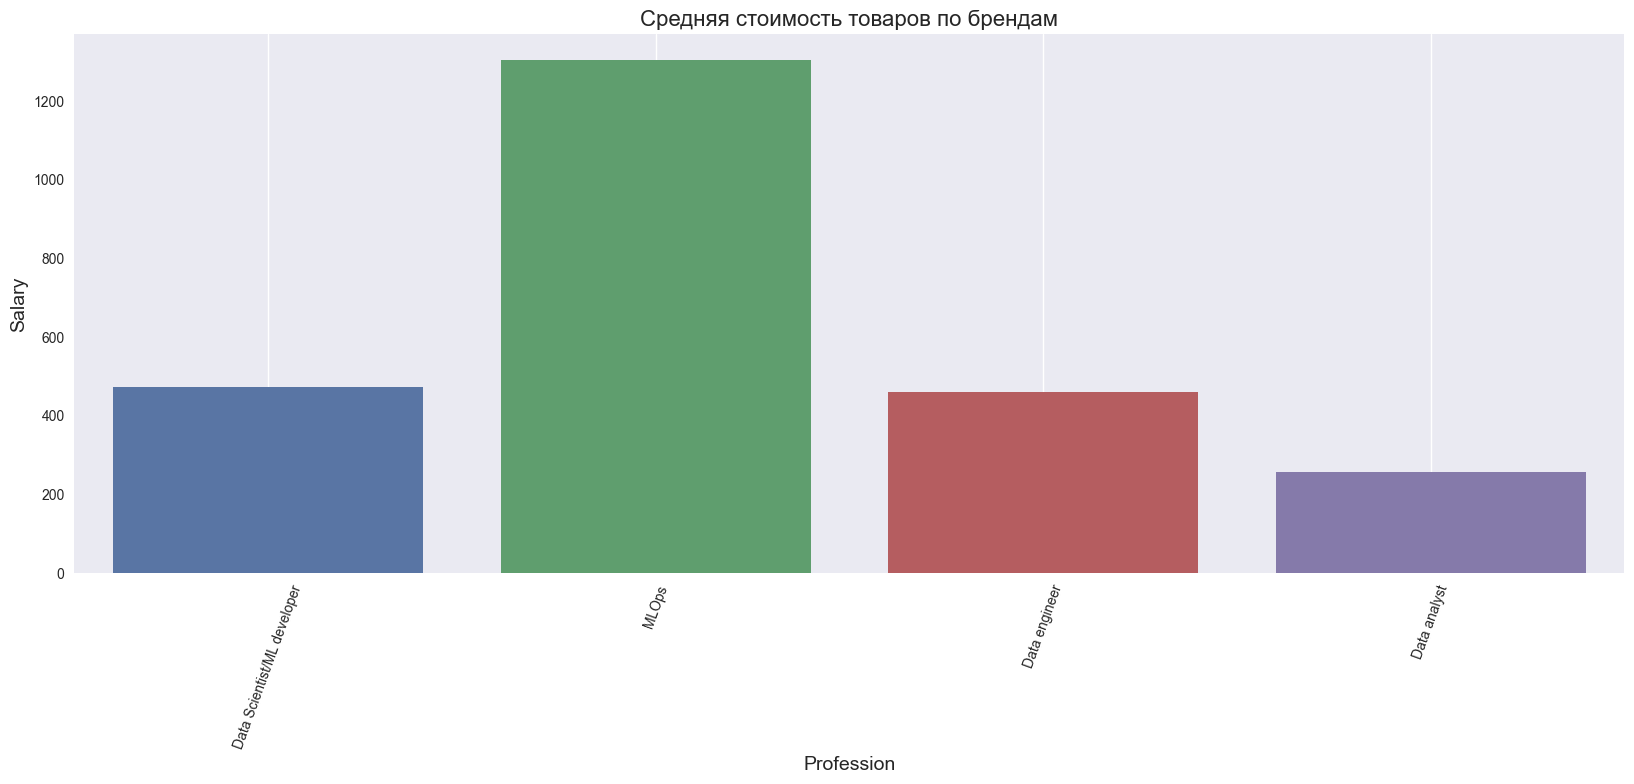

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=df,
    x='profession',
    y='salary_to',
    orient='v',
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Profession', fontsize=14);
barplot1.set_ylabel('Salary', fontsize=14);
barplot1.grid()

#barplot2 = sns.barplot(
#    data=amazon_data,
#    x='brand_name',
#    y='price',
#    hue='product_category',
#    orient='v',
#    ax = axes[1],
#    ci=None,
#    dodge=False
#)
#barplot2.tick_params(axis='x', rotation=70);
#barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
#barplot2.set_xlabel('Название бренда', fontsize=14);
#barplot2.set_ylabel('Средняя цена', fontsize=14);
#barplot2.grid()